# **Steps**
1.Create, Compile, Fit Model

2.Plot

3.Evaluate

In [96]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


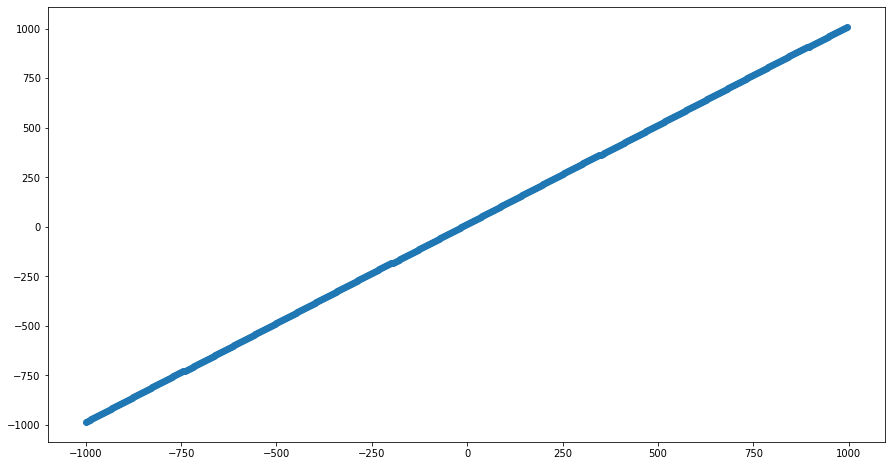

In [97]:
#data
X=tf.range(-1000,1000,5)
y=X+15
plt.figure(figsize=(15,8))
plt.scatter(X,y)

In [98]:
#3sets
print(len(X))
X_train=X[:280]
X_test=X[280:]

y_train=y[:280]
y_test=y[280:]

400


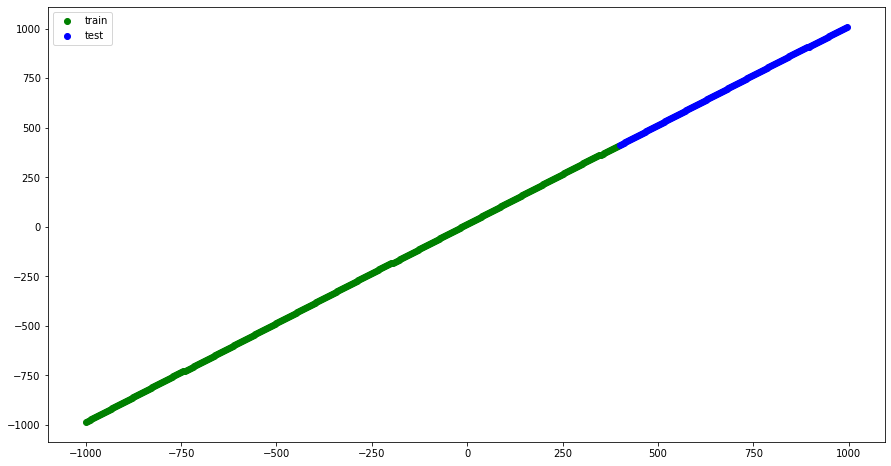

In [99]:
plt.figure(figsize=(15,8))
plt.scatter(X_train,y_train,c="g",label="train")
plt.scatter(X_test,y_test, c="b",label="test")
plt.legend()

In [100]:
#Plot
def Plot(X_train,y_train,X_test,y_test,y_pred): 
  plt.figure(figsize=(15,8))
  plt.scatter(X_train,y_train,c="g",label="train")
  plt.scatter(X_test,y_test, c="b",label="test")
  plt.scatter(X_test,y_pred, c="r",label="Prediction")
  plt.legend();

In [101]:
#Evaluation
def evaluation(y_test,y_pred):
  mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_pred)
  mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_pred)
  return(np.array([mae,mse]))

Creating types of model
1.   Original- 1 layer x 1 100 epoch SGD
2.   Model_1- 1 layer x 1 100 epoch Adam
3.   Model_2-1 layer x 1- 500 epoch Adam
4.   Model_3-2 layer x 100 100 epoch Adam
5.   Model_4-2 layer x100 500 epoch Adam
6.   Model_4-2 layer 10,100 100 epoch Adam

# Orignal Model

In [102]:
#Original
#Creating a model

tf.random.set_seed(42)
original=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
#Compile
original.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.SGD(),
                 metrics=["mae"])
#Fit
original.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100,verbose=0)

y_pred=original.predict(X_test)
y_pred=tf.squeeze(tf.constant(y_pred))

4/4 [==============================] - 0s 3ms/step


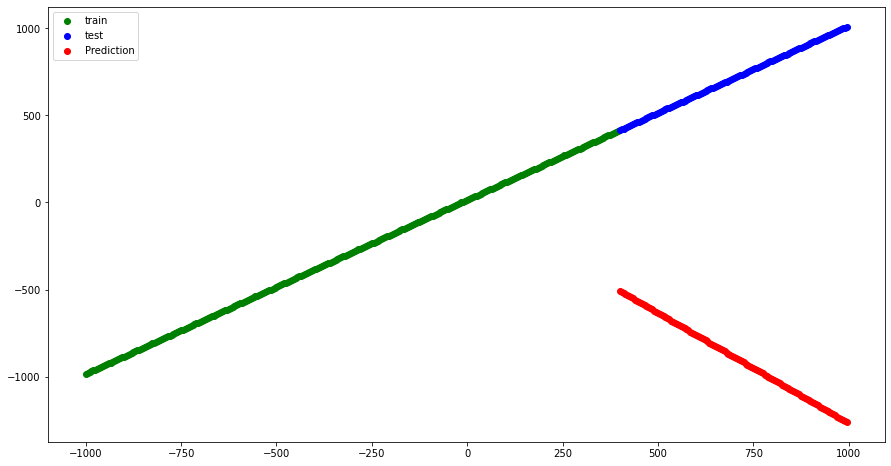

In [103]:
#Plot
Plot(X_train,y_train,X_test,y_test,y_pred)

In [104]:
Eva=[["MAE","MSE"]]
eval=evaluation(y_test,y_pred)
Eva.append(eval)
print(eval)

[1.5966985e+03 2.7037600e+06]


# Model_1

In [105]:
#Model1
#Creating a model
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
#Compile
model_1.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                 metrics=["mae"])
#Fit
model_1.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100,verbose=0)

y_pred1=model_1.predict(X_test)
y_pred1=tf.squeeze(tf.constant(y_pred1[:,0]))

4/4 [==============================] - 0s 3ms/step


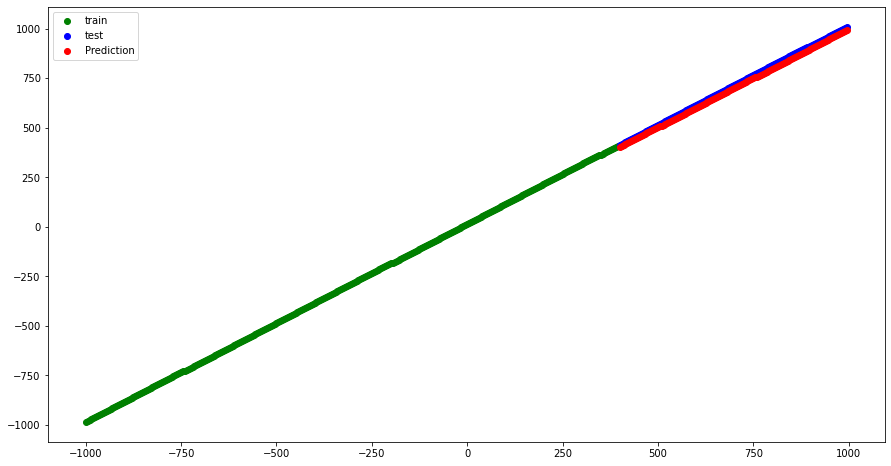

In [106]:
#Plot
Plot(X_train,y_train,X_test,y_test,y_pred1)

In [107]:
eval1=evaluation(y_test,y_pred1)
print(eval1)
Eva.append(eval1)

[ 15.769123 252.32066 ]


# Model_2

In [108]:
#Model2
#Creating a model
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
#Compile
model_2.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                 metrics=["mae"])
#Fit
model_2.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=500,verbose=0)

y_pred2=model_2.predict(X_test)
y_pred2=tf.squeeze(tf.constant(y_pred2[:,0]))

4/4 [==============================] - 0s 3ms/step


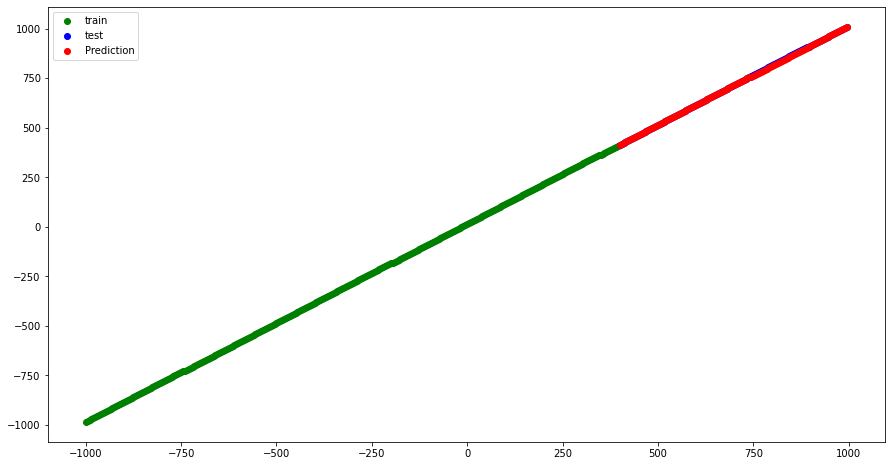

In [109]:
#Plot
Plot(X_train,y_train,X_test,y_test,y_pred2)

In [110]:
eval2=evaluation(y_test,y_pred2)
print(eval2)
Eva.append(eval2)

[1.2826337 1.7462842]


# Model_3

In [111]:
#Model3
#Creating a model
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100)
])
#Compile
model_3.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                 metrics=["mae"])
#Fit
model_3.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100,verbose=0)

y_pred3=model_3.predict(X_test)
y_pred3=tf.squeeze(tf.constant(y_pred3[:,0]))

4/4 [==============================] - 0s 3ms/step


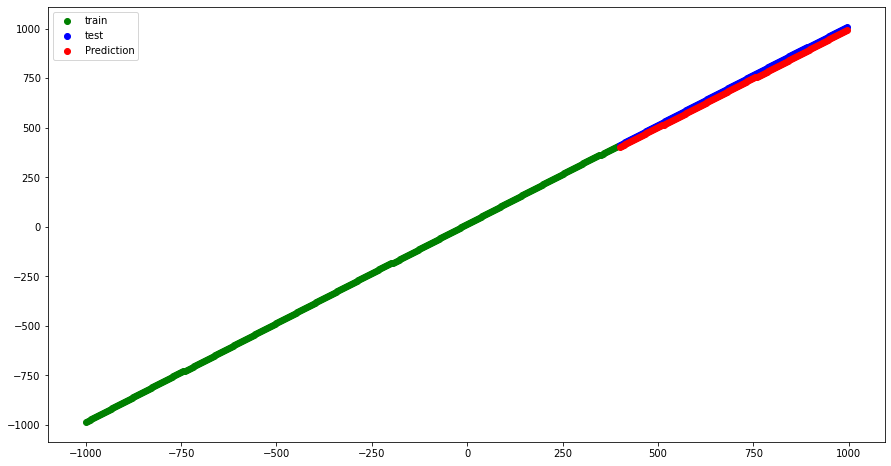

In [112]:
#Plot
Plot(X_train,y_train,X_test,y_test,y_pred3)

In [113]:
eval3=evaluation(y_test,y_pred3)
print(eval3)
Eva.append(eval3)

[ 15.727722 251.19322 ]


# Model_4

In [114]:
#Model4
#Creating a model
model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(100)
])
#Compile
model_4.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                 metrics=["mae"])
#Fit
model_4.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=500,verbose=0)

y_pred4=model_4.predict(X_test)
y_pred4=tf.squeeze(tf.constant(y_pred4[:,0]))

4/4 [==============================] - 0s 2ms/step


In [115]:
eval4=evaluation(y_test,y_pred4)
print(eval4)
Eva.append(eval4)

[1.5491315 2.548084 ]


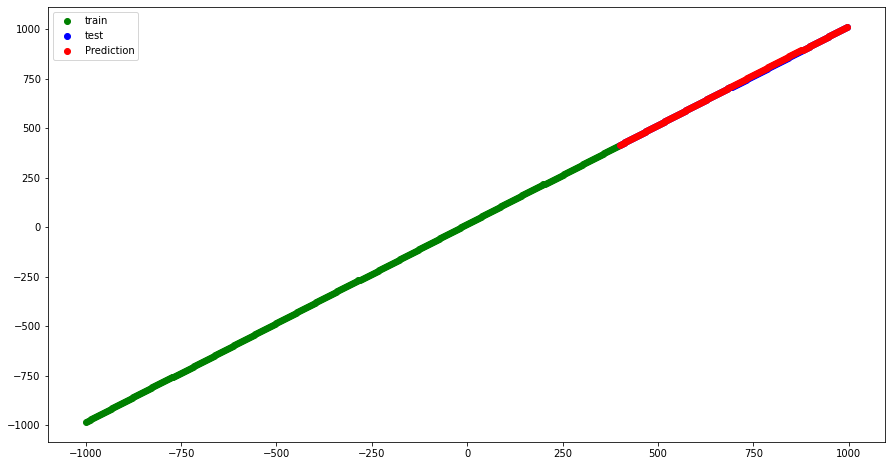

In [116]:
#Plot
Plot(X_train,y_train,X_test,y_test,y_pred4)

# Model_5

In [117]:
#Model5
#Creating a model
model_5=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(100)
])
#Compile
model_5.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                 metrics=["mae"])
#Fit
model_5.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100,verbose=0)

y_pred5=model_5.predict(X_test)
y_pred5=tf.squeeze(tf.constant(y_pred5[:,0]))

4/4 [==============================] - 0s 3ms/step


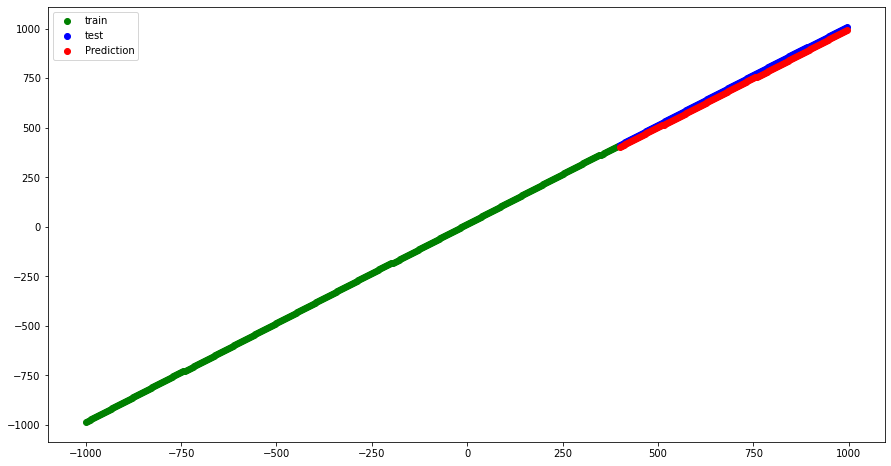

In [118]:
#Plot
Plot(X_train,y_train,X_test,y_test,y_pred3)

In [119]:
eval5=evaluation(y_test,y_pred5)
print(eval5)
Eva.append(eval5)

[0.76571476 0.6178482 ]


# Table

In [120]:
import pandas as pd
print(Eva)
pd.DataFrame(Eva)

[['MAE', 'MSE'], array([1.5966985e+03, 2.7037600e+06], dtype=float32), array([ 15.769123, 252.32066 ], dtype=float32), array([1.2826337, 1.7462842], dtype=float32), array([ 15.727722, 251.19322 ], dtype=float32), array([1.5491315, 2.548084 ], dtype=float32), array([0.76571476, 0.6178482 ], dtype=float32)]


,0,1
0,MAE,MSE
1,1596.698486,2703760.0
2,15.769123,252.320663
3,1.282634,1.746284
4,15.727722,251.193222
5,1.549132,2.548084
6,0.765715,0.617848


In [121]:
#Save Model
model_5.save('/content/drive/MyDrive/Models/First/Best_HDF5_Format.h5')
model_5.save('/content/drive/MyDrive/Models/First/Best_SavedModel_Format')
loadedS = tf.keras.models.load_model("/content/drive/MyDrive/Models/First/Best_SavedModel_Format")
loadedS.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 10)                20        
                                                                 
 dense_29 (Dense)            (None, 100)               1100      
                                                                 
Total params: 1,120
Trainable params: 1,120
Non-trainable params: 0
_________________________________________________________________


In [122]:
# # Download the model (or any file) from Google Colab(File in Drive)
# from google.colab import files
# files.download("/content/drive/MyDrive/Models/First/Best_SavedModel_Format")